<a href="https://colab.research.google.com/github/kolinaf/Data-342-Lab-1/blob/main/DATA_342_Lab_1_Coca_Cola_%26_Pepsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 1: Using Discriptive Statistics to Evaluate Daily Returns between Coca-Cola and Pepsi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Install Required Libraries

In [ ]:
!pip install openpyxl matplotlib pandas

Step 3: Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Step 4: Load the Excel File

In [ ]:
import requests
import pandas as pd

file_id = '1bRR5Z6ui3Ycz46HybX42FSSPcE_L4LQFLo0eVOVg7kI'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'

response = requests.get(url)
if response.status_code == 200:
    with open('MyGoogleSheet.xlsx', 'wb') as f:
        f.write(response.content)

    df = pd.read_excel('MyGoogleSheet.xlsx', engine='openpyxl')
    display(df.head())
else:
    print(f"Error downloading file: {response.status_code}")

,Date,Company,Adj Close,Daily Return
0,2024-01-02,KO,56.78,NaN
1,2024-01-03,KO,56.91,0.0023
2,2024-01-04,KO,56.72,-0.0033
3,2024-01-05,KO,56.64,-0.0014
4,2024-01-08,KO,57.05,0.0072


Step 5: Create Data Frame

In [ ]:
ko_df = df[df['Ticker'] == 'KO'].copy()
pepsi_df = df[df['Ticker'] == 'PEP'].copy()

print("\nCoca-Cola Daily Returns:")
print(ko_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nPepsi Daily Returns:")
print(pepsi_df[['Date', 'Adj Close', 'Daily Return']].head())


Coca-Cola Daily Returns:
        Date  Adj Close  Daily Return
0 2024-01-02      56.78           NaN
1 2024-01-03      56.91        0.0023
2 2024-01-04      56.72       -0.0033
3 2024-01-05      56.64       -0.0014
4 2024-01-08      57.05        0.0072

Pepsi Daily Returns:
          Date  Adj Close  Daily Return
251 2024-01-02     162.68        1.6809
252 2024-01-03     162.72        0.0002
253 2024-01-04     161.33       -0.0085
254 2024-01-05     158.95       -0.0148
255 2024-01-08     159.11        0.0010


Step 6: Display Sample Rows

In [ ]:
print("Sample rows from the dataset:")
print(df.head())

Sample rows from the dataset:
        Date Ticker  Adj Close  Daily Return
1 2024-01-03     KO      56.91        0.0023
2 2024-01-04     KO      56.72       -0.0033
3 2024-01-05     KO      56.64       -0.0014
4 2024-01-08     KO      57.05        0.0072
5 2024-01-09     KO      56.95       -0.0018


Step 7: Clean and Format the Data

In [ ]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])  # removes rows with missing returns

Step 8: Seperate Coco-Cola and Pepsi Data

In [ ]:
ko_df = df[df['Company'] == 'Coca-Cola']. copy()
pepsi_df = df[df['Company'] == 'Pepsi'] . copy()

In [ ]:
ko_df = df[df['Ticker'] == 'KO'].copy()
pepsi_df = df[df['Ticker'] == 'PEP'].copy()

print("\nCoca-Cola Daily Returns:")
print(ko_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nPepsi Daily Returns:")
print(pepsi_df[['Date', 'Adj Close', 'Daily Return']].head())


Coca-Cola Daily Returns:
        Date  Adj Close  Daily Return
1 2024-01-03      56.91        0.0023
2 2024-01-04      56.72       -0.0033
3 2024-01-05      56.64       -0.0014
4 2024-01-08      57.05        0.0072
5 2024-01-09      56.95       -0.0018

Pepsi Daily Returns:
          Date  Adj Close  Daily Return
251 2024-01-02     162.68        1.6809
252 2024-01-03     162.72        0.0002
253 2024-01-04     161.33       -0.0085
254 2024-01-05     158.95       -0.0148
255 2024-01-08     159.11        0.0010


Step 9: Visualize Daily Returns with Box and Whisker Plots

/tmp/ipython-input-4230467824.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


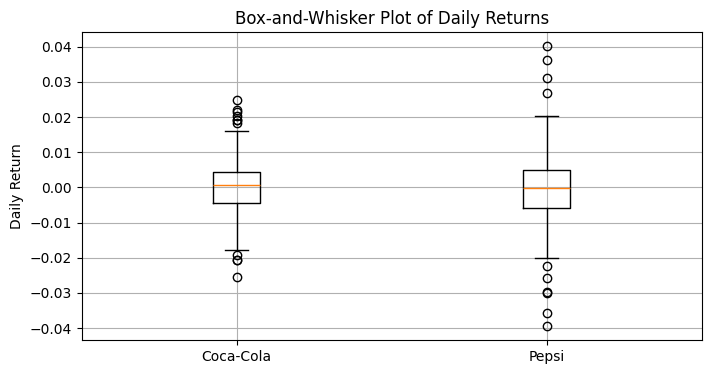

In [ ]:
plt.figure(figsize=(8, 4))
plt.boxplot(
    [ko_clean['Daily Return'], pepsi_clean['Daily Return']],
    labels=['Coca-Cola', 'Pepsi'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

xls = pd.ExcelFile('DATA 342 Lab 1.xlsx', engine='openpyxl')
print(xls.sheet_names)


['Sheet1']


In [9]:
import pandas as pd

df = pd.read_excel('DATA 342 Lab 1.xlsx', sheet_name='Sheet1', engine='openpyxl')
print(df.head())


        Date Ticker  Adj Close  Daily Return
0 2024-01-02     KO      56.78           NaN
1 2024-01-03     KO      56.91        0.0023
2 2024-01-04     KO      56.72       -0.0033
3 2024-01-05     KO      56.64       -0.0014
4 2024-01-08     KO      57.05        0.0072


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])

# Split into Coca-Cola and Pepsi data
ko_df = df[df['Ticker'] == 'KO'].copy()
pep_df = df[df['Ticker'] == 'PEP'].copy()


Step 10: Descriptive Statistics

In [13]:
from scipy import stats

# Define a function to calculate descriptive statistics
def descriptive_stats(series):
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if not series.mode().empty else None,
        'Standard Deviation': series.std(),
        'Sample Variance': series.var(),
        'Kurtosis': series.kurtosis(),
        'Skewness': series.skew(),
        'Range': series.max() - series.min(),
        'Minimum': series.min(),
        'Maximum': series.max()
    }

# Compute descriptive statistics for Coca-Cola (KO) and Pepsi (PEP)
ko_stats = descriptive_stats(ko_df['Daily Return'])
pep_stats = descriptive_stats(pep_df['Daily Return'])

# Display results clearly
print("Descriptive Statistics for Coca-Cola (KO):")
for key, value in ko_stats.items():
    print(f"{key}: {value}")

print("\nDescriptive Statistics for Pepsi (PEP):")
for key, value in pep_stats.items():
    print(f"{key}: {value}")


Descriptive Statistics for Coca-Cola (KO):
Mean: 0.0002991999999999999
Median: 0.0006000000000000001
Mode: 0.0
Standard Deviation: 0.00804284706529116
Sample Variance: 6.468738891566263e-05
Kurtosis: 0.7097325177519012
Skewness: 0.050096746475664596
Range: 0.0505
Minimum: -0.0255
Maximum: 0.025

Descriptive Statistics for Pepsi (PEP):
Mean: 0.0063513944223107565
Median: -0.0003
Mode: -0.0031
Standard Deviation: 0.10661374558680421
Sample Variance: 0.011366490748047815
Kurtosis: 246.32130594838978
Skewness: 15.621867163628378
Range: 1.7204000000000002
Minimum: -0.0395
Maximum: 1.6809


Step 11: Hypothesis Testing

In [15]:
# Hypothesis Testing: Independent t-test (Coca-Cola vs. Pepsi)
t_stat, p_value = stats.ttest_ind(ko_df['Daily Return'], pep_df['Daily Return'], equal_var=False)

print("\nHypothesis Testing (Independent t-test):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("\nResult: There is a statistically significant difference between Coca-Cola and Pepsi's mean daily returns.")
else:
    print("\nResult: There is no statistically significant difference between Coca-Cola and Pepsi's mean daily returns.")



Hypothesis Testing (Independent t-test):
T-statistic: -0.8968076830326455
P-value: 0.3706745776717566

Result: There is no statistically significant difference between Coca-Cola and Pepsi's mean daily returns.


Step 12: Bar Graph with Error Bars

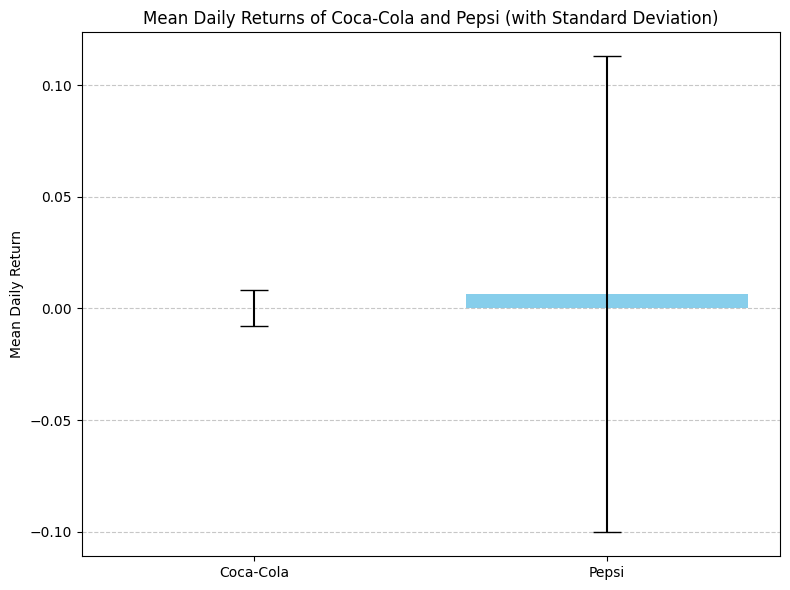


Interpretation:
The p-value > 0.05, so we fail to reject the null hypothesis.
This means there is no statistically significant difference in the average daily returns between Coca-Cola and Pepsi based on this dataset.


In [18]:
# Install required libraries (if not already installed)
!pip install pandas matplotlib openpyxl scipy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load your Excel file (adjust file name if needed)
file_path = 'DATA 342 Lab 1.xlsx'  # or '342 Fall 2025 Lab 1 (1).xlsx' if that's the uploaded file name
df = pd.read_excel(file_path, sheet_name='Sheet1', engine='openpyxl')

# Clean and filter the data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Daily Return'])

# Separate Coca-Cola and Pepsi data
ko_df = df[df['Ticker'] == 'KO'].copy()
pep_df = df[df['Ticker'] == 'PEP'].copy()

# Compute mean and standard deviation for error bars
mean_ko = ko_df['Daily Return'].mean()
std_ko = ko_df['Daily Return'].std()
mean_pep = pep_df['Daily Return'].mean()
std_pep = pep_df['Daily Return'].std()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(ko_df['Daily Return'], pep_df['Daily Return'], equal_var=False)

# Create bar plot with error bars
means = [mean_ko, mean_pep]
errors = [std_ko, std_pep]
labels = ['Coca-Cola', 'Pepsi']
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, means, yerr=errors, capsize=10, color=colors)

# Add asterisk if p-value < 0.05
if p_value < 0.05:
    max_height = max(means)
    y = max_height + max(errors) + 0.005
    plt.plot([0, 1], [y, y], color='black')
    plt.text(0.5, y + 0.002, '*', ha='center', va='bottom', fontsize=20)

# Customize plot
plt.title('Mean Daily Returns of Coca-Cola and Pepsi (with Standard Deviation)')
plt.ylabel('Mean Daily Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --------------------------
# INTERPRETATION SECTION
# --------------------------
print("\nInterpretation:")
if p_value > 0.05:
    print("The p-value > 0.05, so we fail to reject the null hypothesis.")
    print("This means there is no statistically significant difference in the average daily returns between Coca-Cola and Pepsi based on this dataset.")
else:
    print("The p-value < 0.05, so we reject the null hypothesis.")
    print("This means there is a statistically significant difference in the average daily returns between Coca-Cola and Pepsi based on this dataset.")
